In [1]:
ENV["OMP_NUM_THREADS"] = "8"
using TSSM
include("time_stepper.jl");

 *** OPENMP n_threads =           8


In [2]:
cubic_coupling = -1.0
xmin=-16.0
xmax=16.0
Nx=1024

m=Schroedinger1D(Nx,xmin, xmax,cubic_coupling=cubic_coupling)

 W: could not import fftw wisdom file


TSSM.Schroedinger1D(Ptr{Void} @0x000000000265d820)

In [3]:
psi=wave_function(m)

TSSM.WfSchroedinger1D(Ptr{Void} @0x0000000002769ab0,TSSM.Schroedinger1D(Ptr{Void} @0x000000000265d820))

In [4]:
const a=[2.0, 2.0,  0.0,  0.0] #aplitude
const b=[1.0,-3.0,  1.0, -9.0] #speed
const c=[5.0,-5.0,  0.0, -10.0] #offset x

function soliton(x)
    (a[1]/cosh(a[1]*(x-c[1]))) * exp(-b[1]*x*1im)+
    (a[2]/cosh(a[2]*(x-c[2]))) * exp(-b[2]*x*1im)+
    (a[3]/cosh(a[3]*(x-c[3]))) * exp(-b[3]*x*1im)+
    (a[4]/cosh(a[4]*(x-c[4]))) * exp(-b[4]*x*1im)
end

soliton (generic function with 1 method)

In [5]:
palindromic_scheme_34 = PalindromicScheme( 
          ( 0.268330095781759925,  0.919661523017399857, 
           -0.187991618799159782, -0.187991618799159782, 
            0.919661523017399857,  0.268330095781759925 ),
            3 )

palindromic_scheme_56 = PalindromicScheme(
          ( 0.201651044312324230,   0.578800656272664932, 
            0.562615975356569200,   0.273128836056524479, 
            0.253874038247554845,  -0.102733803148432142, 
           -0.835351693190370636,   0.068014946093165092, 
            0.068014946093165092,  -0.835351693190370636,
           -0.102733803148432142,   0.253874038247554845, 
            0.273128836056524479,   0.562615975356569200, 
            0.578800656272664932,   0.201651044312324230 ),            
            5 )

PalindromicScheme((0.20165104431232422,0.578800656272665,0.5626159753565692,0.2731288360565245,0.25387403824755483,-0.10273380314843214,-0.8353516931903706,0.0680149460931651,0.0680149460931651,-0.8353516931903706,-0.10273380314843214,0.25387403824755483,0.2731288360565245,0.5626159753565692,0.578800656272665,0.20165104431232422),5)

In [6]:
x = get_nodes(psi);
to_real_space!(psi);
u = get_data(psi, true);

In [7]:

  tend=10.0
  t0=0.0
  out=1
  tol=1e-8

1.0e-8

In [12]:
set!(psi, soliton)

plotdata=abs(u).^2
steps=[0.0]
mytime=[0.0]
told=0.0
nsteps=0

tic()
  for t in adaptive_time_stepper(psi, t0, tend, 0.01, tol, palindromic_scheme_56, "AB")
       #readline(STDIN)
      push!(steps,t-told)
      push!(mytime,t)
      told=t
      nsteps=nsteps+1
  
      if out==1
      to_real_space!(psi)
        plotdata = [plotdata abs(u).^2]
         @printf("t=%5.3f\n", t)
         #figure(2)
         #hold(false)
         #plot(x, abs(u).^2)
         #hold(true)
      end
  end
toc()

t=0.010
t=0.022
t=0.035
t=0.047
t=0.059
t=0.072
t=0.084
t=0.096
t=0.109
t=0.121
t=0.134
t=0.146
t=0.158
t=0.171
t=0.183
t=0.196
t=0.208
t=0.220
t=0.233
t=0.245
t=0.258
t=0.270
t=0.282
t=0.295
t=0.307
t=0.320
t=0.332
t=0.344
t=0.357
t=0.369
t=0.382
t=0.394
t=0.406
t=0.419
t=0.431
t=0.444
t=0.456
t=0.468
t=0.481
t=0.493
t=0.506
t=0.518
t=0.530
t=0.543
t=0.555
t=0.568
t=0.580
t=0.592
t=0.605
t=0.617
t=0.630
t=0.642
t=0.654
t=0.667
t=0.679
t=0.692
t=0.704
t=0.716
t=0.729
t=0.741
t=0.754
t=0.766
t=0.778
t=0.791
t=0.803
t=0.815
t=0.828
t=0.840
t=0.853
t=0.865
t=0.877
t=0.890
t=0.902
t=0.915
t=0.927
t=0.939
t=0.952
t=0.964
t=0.977
t=0.989
t=1.001
t=1.014
t=1.026
t=1.039
t=1.051
t=1.063
t=1.076
t=1.088
t=1.101
t=1.113
t=1.125
t=1.138
t=1.150
t=1.163
t=1.175
t=1.187
t=1.200
t=1.212
t=1.225
t=1.237
t=1.249
t=1.262
t=1.274
t=1.286
t=1.299
t=1.311
t=1.324
t=1.336
t=1.348
t=1.361
t=1.373
t=1.386
t=1.398
t=1.411
t=1.423
t=1.435
t=1.448
t=1.460
t=1.473
t=1.485
t=1.498
t=1.510
t=1.522
t=1.535
t=1.547


1.704347429

.869
t=9.879
t=9.890
t=9.900
t=9.910
t=9.920
t=9.930
t=9.940
t=9.950
t=9.960
t=9.970
t=9.980
t=9.989
t=9.998
t=10.000
elapsed time: 1.704347429 seconds


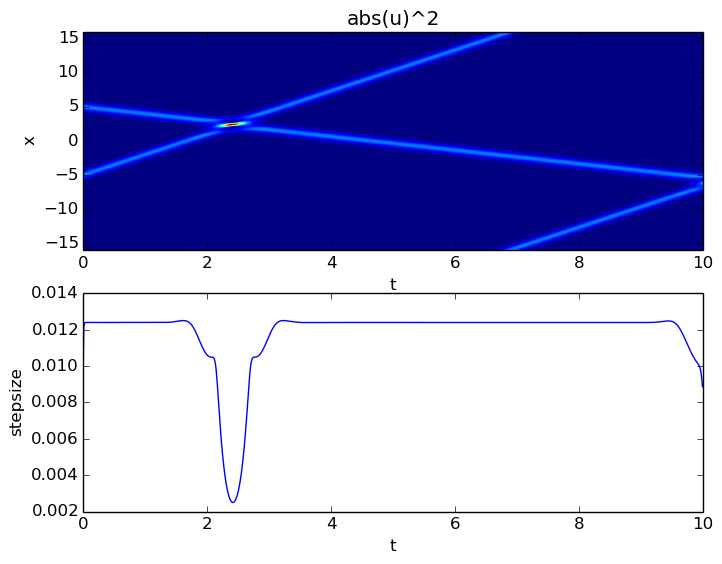

In [13]:
  using PyPlot
  figure(1)
  hold(false)
  if out==1
  subplot(2, 1, 1)
  pcolormesh(mytime,x,plotdata)
  xlabel("t")
  ylabel("x")
  #colorbar()
  axis([t0,tend,xmin,xmax])
  title("abs(u)^2")

  subplot(2, 1, 2)
  end
  plot(mytime[1:end-2], steps[2:end-1])
  xlabel("t")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")
  #colorbar( )